### DBScan
DBscan is clustering algorithm but it, unlike K-means, does not have centroids, so it is more sensitive to the nonlinear patterns of connections between features we want to group and identify hidden paterns. DBScan thus uses radius and group values of the data if they belong in to the area of some hypotesised radius. Let’s take a look.

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
 

features, moon_type = make_moons(n_samples=300, noise=0.05, random_state=0)
df = pd.DataFrame(features, columns=['x', 'y'])
moon = pd.DataFrame(moon_type, columns=['moon_type'])
df = df.merge(moon, left_index=True, right_index=True)
df.head()

,x,y,moon_type
0,0.715413,-0.494089,1
1,0.246789,-0.240091,1
2,0.943261,0.346800,0
3,0.973742,-0.492901,1
4,1.239713,-0.411411,1


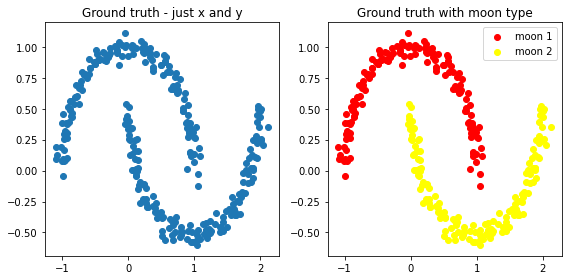

In [2]:
fig = plt.figure(figsize=(8,4))

#first subplot
ax1 = fig.add_subplot(1,2,1)
plt.scatter(df['x'], df['y'])
plt.tight_layout()
plt.title('Ground truth - just x and y')

#second subplot
ax1 = fig.add_subplot(1,2,2)
plt.scatter(df[df['moon_type']==0]['x'], df[df['moon_type']==0]['y'], color = 'red', label='moon 1')
plt.scatter(df[df['moon_type']==1]['x'], df[df['moon_type']==1]['y'], color = 'yellow', label='moon 2')
plt.tight_layout()
plt.title('Ground truth with moon type')
plt.legend();

In [13]:
# Now we will imagane we do not know if there are moons, but we will check it with DB scan
from sklearn.cluster import DBSCAN
from itertools import product

# We will try to make different Density-Based Spatial Clustering based on diferent noise parameter and 
# eps, the maximum distance between two samples for one to be considered as in the neighborhood of the other
eps = (0.35, 0.3, 0.2, 0.1)
noise = (0.01, 0.05, 0.07, 0.1)
combs = list(product(eps, noise))

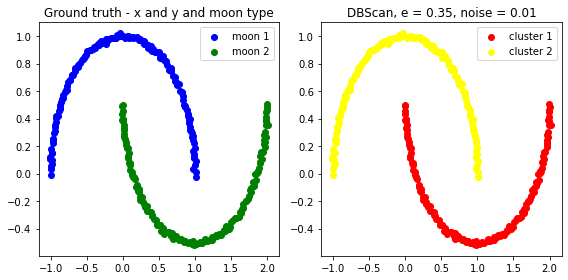

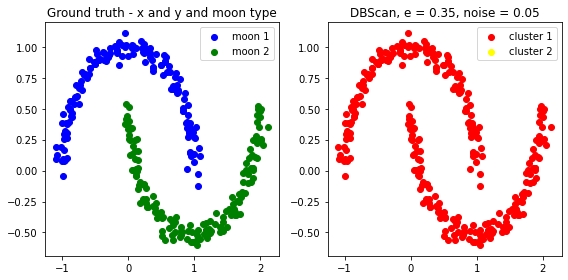

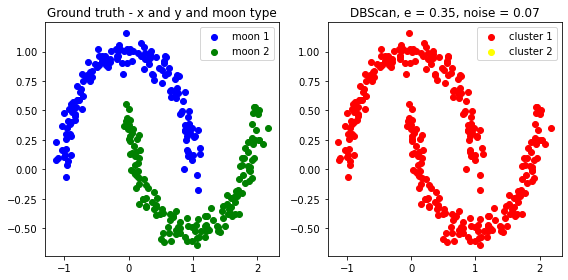

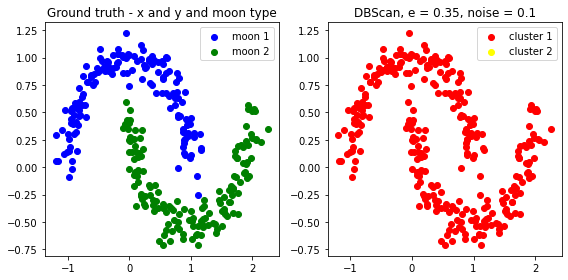

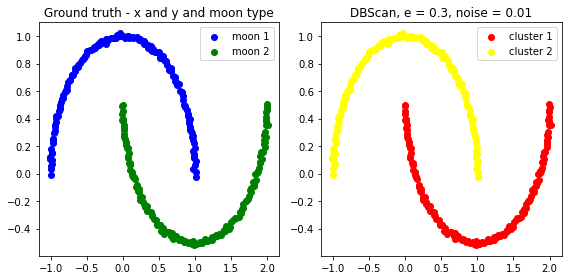

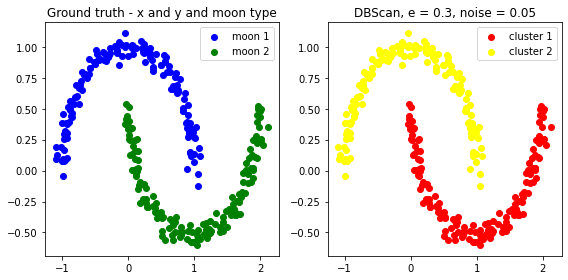

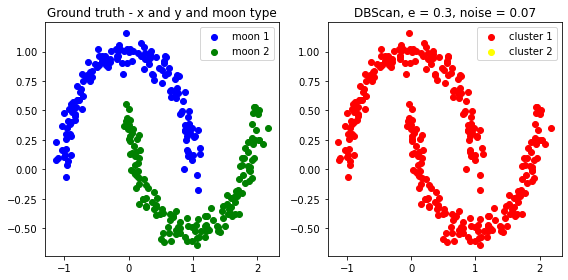

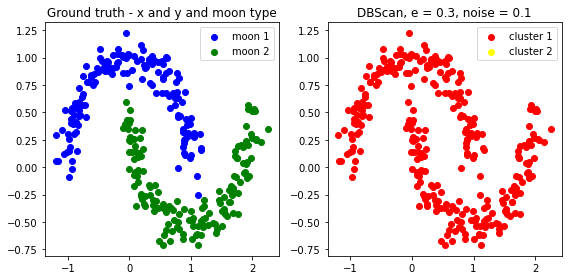

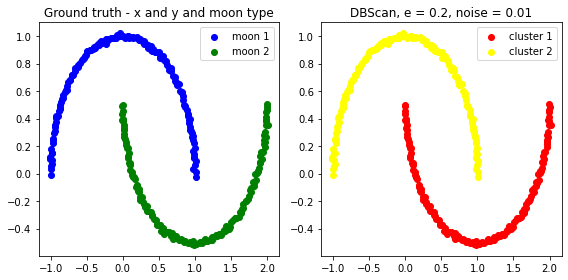

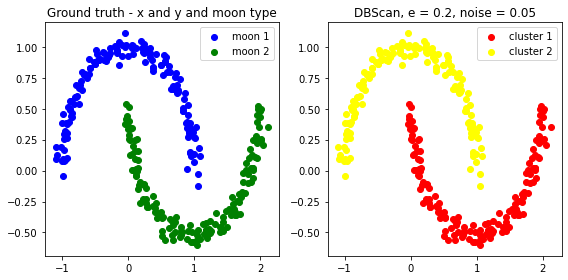

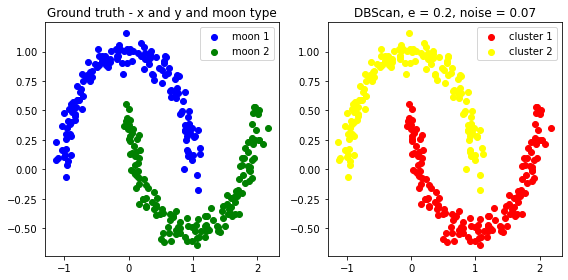

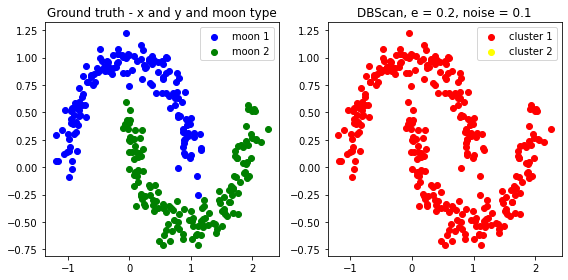

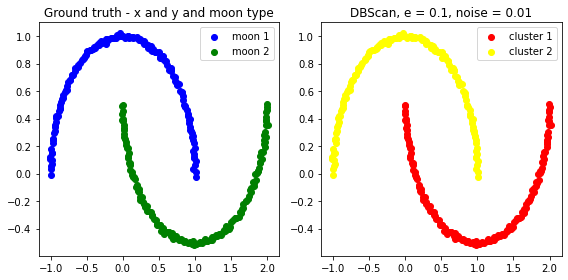

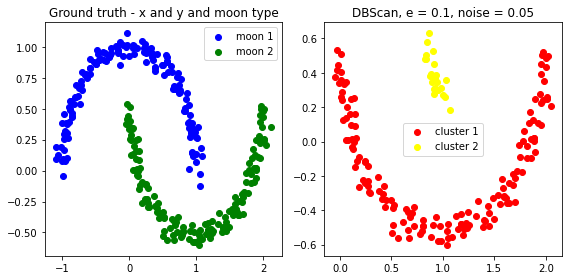

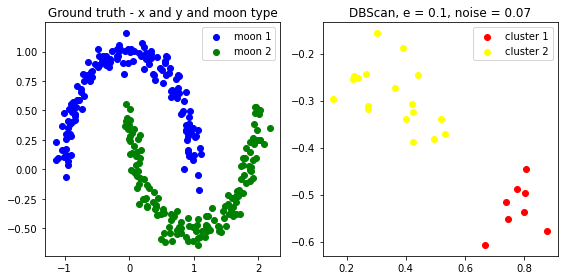

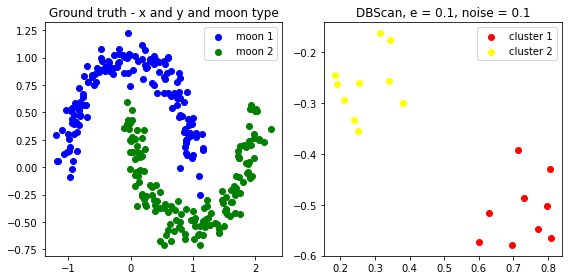

In [19]:
# with big radius and noise, algorithm is not so successfull
for epsi, noise_ in combs:
    features, moon_type = make_moons(n_samples=300, noise=noise_, random_state=0)
    df = pd.DataFrame(features, columns=['x', 'y'])
    moon = pd.DataFrame(moon_type, columns=['moon_type'])
    df = df.merge(moon, left_index=True, right_index=True)
    db = DBSCAN(eps=epsi, min_samples=5, metric='euclidean')
    y_db = db.fit_predict(features)
    db_clusters = pd.DataFrame(y_db, columns=['db_clusters'])
    df = df.merge(db_clusters, left_index=True, right_index=True)
    
    fig = plt.figure(figsize=(8,4))

#first subplot
    ax1 = fig.add_subplot(1,2,1)
    plt.scatter(df[df['moon_type']==0]['x'], df[df['moon_type']==0]['y'], color = 'blue', label = 'moon 1')
    plt.scatter(df[df['moon_type']==1]['x'], df[df['moon_type']==1]['y'], color = 'green', label = 'moon 2')
    plt.tight_layout()
    plt.title('Ground truth - x and y and moon type')
    plt.legend()

#second subplot
    ax1 = fig.add_subplot(1,2,2)
    plt.scatter(df[df['db_clusters']==0]['x'], df[df['db_clusters']==0]['y'], color = 'red', label='cluster 1')
    plt.scatter(df[df['db_clusters']==1]['x'], df[df['db_clusters']==1]['y'], color = 'yellow', label='cluster 2')
    plt.tight_layout()
    plt.title(f'DBScan, e = {epsi}, noise = {noise_}')
    plt.legend();